In [25]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras.utils import np_utils
from keras.datasets import mnist

In [26]:
# load dữ liệu MNIST

(X_train,y_train), (X_test,y_test) = mnist.load_data()

In [27]:
# chia dử liệu test thành 2 tập 1 tập để test 1 tập để đánh giá 
X_val, y_val = X_train[50000:60000,:], y_train[50000:60000]
X_test, y_test = X_train[0:50000,:], y_train[0:50000]

In [42]:
# reshape lại kích cở mà keras yêu cầu.
X_train =X_train.reshape(X_train.shape[0],28,28,1) # trả về số chiều và số độ cao x độ rộng x số chiều ảnh.
X_val =X_val.reshape(X_val.shape[0],28,28,1)
X_test =X_test.reshape(X_test.shape[0],28,28,1)
X_train.shape

(60000, 28, 28, 1)

In [29]:
#one hot encoding label.
Y_train = np_utils.to_categorical(y_train,10)
Y_val = np_utils.to_categorical(y_val,10)
Y_test = np_utils.to_categorical(y_test,10)

print("dữ liệu ban đầu là: ",y_train[0])
print("Dữ liệu sau encoding là: ", Y_train[0])

dữ liệu ban đầu là:  5
Dữ liệu sau encoding là:  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [30]:
# định nghĩa model
model = Sequential()

In [31]:
#thêm convolutional với 32 kernel với kích thước 3x3
# dùng hàm sigmoid làm hàm activation(Hàm kích hoạt) và chỉ rỏ input shape(kiểu đầu vào) cho lây ở đầu tiền
model.add(Conv2D(32,(3,3),activation="sigmoid",input_shape=(28,28,1)))

In [32]:
# thêm convalutional layer để giảm kích thước ảnh
model.add(Conv2D(32,(3,3),activation="sigmoid"))

In [33]:
# thêm max pooling layer.
model.add(MaxPooling2D(pool_size=(2,2)))

In [34]:
# chuyển tensor (>2 chiều) thành dạng vector
model.add(Flatten())

In [35]:
# thêm fully conneted với 128 nodes và dùng hàm sigmoid
model.add(Dense(128,activation="sigmoid"))

In [36]:
# set output cho đầu ra có 10 class từ 0 đến 9
model.add(Dense(10,activation="softmax"))

In [37]:
#hoàng thành model(compile model) chỉ rỏ hàm mất mát(loss funcion) và phương thức dùng để tối ưu hàm loss function
model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics="accuracy")


In [38]:
# thực hành train model vói data
H = model.fit(X_train,Y_train,
              validation_data=(X_val,Y_val),
              batch_size=32,
              epochs=10,
              verbose=1)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3023 - accuracy: 0.9203 - val_loss: 0.0641 - val_accuracy: 0.9837
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0580 - accuracy: 0.9836 - val_loss: 0.0432 - val_accuracy: 0.9883
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0389 - accuracy: 0.9888 - val_loss: 0.0246 - val_accuracy: 0.9936
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0256 - accuracy: 0.9923 - val_loss: 0.0178 - val_accuracy: 0.9950
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0174 - accuracy: 0.9955 - val_loss: 0.0141 - val_accuracy: 0.9969
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0121 - accuracy: 0.9969 - val_loss: 0.0093 - val_accuracy: 0.9977
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0080 - accuracy: 0.9980 - val_loss: 0.0058 - val_accuracy:

In [41]:
# đánh giá mô hình với dử liệu test return loss value and metrics values
score = model.evaluate(X_test,Y_test,verbose=0)
score

[0.006116334814578295, 0.9981799721717834]

In [43]:
# trực quan hóa bằng biểu đồ.

fig = plt.figure()

<Figure size 432x288 with 0 Axes>

In [45]:
numofEpoch = 10

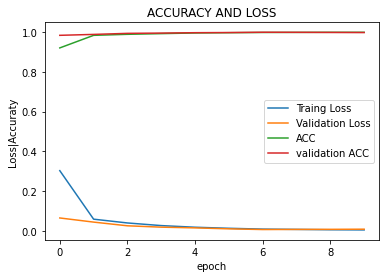

In [60]:
plt.plot(np.arange(0,numofEpoch),H.history["loss"], label="Traing Loss")
plt.plot(np.arange(0,numofEpoch),H.history["val_loss"], label="Validation Loss")
plt.plot(np.arange(0,numofEpoch),H.history["accuracy"],label = "ACC")
plt.plot(np.arange(0,numofEpoch),H.history["val_accuracy"],label = "validation ACC")
plt.title("ACCURACY AND LOSS")
plt.xlabel("epoch")
plt.ylabel("Loss|Accuraty")
plt.legend()

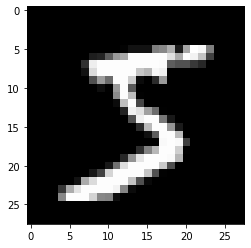

In [59]:
# đây là bức ảnh đầu tiền trong test_data(x_test)
plt.imshow(X_test[0].reshape(28,28),cmap ="gray")

In [62]:
y_predict = model.predict(X_test[0].reshape(1,28,28,1))
print(y_predict)
print("_._._._._")
print("giá trị dự đoán hình là : ",np.argmax(y_predict))

1/1 [==============================] - 0s 15ms/step
[[2.3706315e-08 2.1939098e-07 4.1028847e-09 2.3927310e-02 1.9410140e-09
  9.7606158e-01 1.6345172e-08 5.3251952e-06 3.9345368e-06 1.5137920e-06]]
_._._._._
giá trị dự đoán hình là :  5
